# Micro-Credit Project. 
Predicting the likelyhood of a loan being paid back within 5 days.

# Load and take a look at the data

In [1]:
# Load relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load data
ds=pd.read_csv('Micro_Credit.csv')

In [3]:
ds.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [4]:
ds.shape

(209593, 37)

In [5]:
ds.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

# Check and treat null values

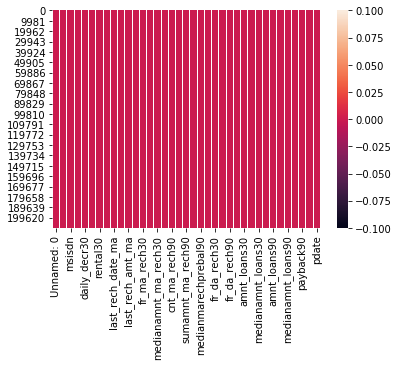

In [6]:
sns.heatmap(ds.isnull())

No null values present.

# EDA

# Replace unlikely values with the most common value per column

In [7]:
# count the amounts of given entries in a column
ds['cnt_loans30'].value_counts()

1     83432
2     42665
3     27050
4     17499
5     11673
6      7773
7      5041
8      3384
0      3259
9      2273
10     1571
11     1143
12      793
13      547
14      383
15      270
16      213
17      164
18       98
19       77
20       54
21       45
22       42
23       38
25       19
26       17
27       15
24       13
29        9
31        8
28        7
30        4
32        4
33        3
38        2
41        1
44        1
36        1
35        1
50        1
Name: cnt_loans30, dtype: int64

Data looks probable.

In [8]:
# count the amounts of given entries in a column
ds['amnt_loans30'].value_counts()

6      76620
12     44384
18     26379
24     18403
30     11999
36      8559
42      5580
48      3994
0       3259
54      2660
60      2043
66      1402
72      1101
78       742
84       580
90       394
96       333
102      252
108      182
114      135
120      119
132       92
126       80
138       64
156       34
144       30
150       30
162       29
168       20
174       17
186       15
180       13
192        7
198        6
210        4
252        4
228        4
216        4
276        3
222        3
264        3
258        3
204        2
240        2
300        1
270        1
306        1
246        1
Name: amnt_loans30, dtype: int64

In [9]:
# count the amounts of given entries in a column
ds['maxamnt_loans30'].value_counts()

6.000000        179193
12.000000        26109
0.000000          3244
59275.166722         1
68599.755670         1
                 ...  
26462.333521         1
53666.885900         1
67319.013426         1
36610.121211         1
28708.879352         1
Name: maxamnt_loans30, Length: 1050, dtype: int64

The values above 12 look improbable and should be adjusted to the most common value.

In [10]:
# count the amounts of given entries in a column
ds['medianamnt_loans30'].value_counts()

0.0    195445
1.0      7149
0.5      6538
2.0       420
1.5        38
3.0         3
Name: medianamnt_loans30, dtype: int64

Values appear possible.

In [11]:
# count the amounts of given entries in a column
ds['cnt_loans90'].value_counts()

1.000000       73862
2.000000       37286
3.000000       23986
4.000000       16761
5.000000       12331
               ...  
3043.099370        1
2667.929173        1
2508.179038        1
2604.261985        1
4876.239599        1
Name: cnt_loans90, Length: 1110, dtype: int64

Extremely large values are impossible, since the max amounnt of loans per 30 days were 50,any value above 150 will be adjusted to the most common value.

In [12]:
# count the amounts of given entries in a column
ds['amnt_loans90'].value_counts()

6      69131
12     38908
18     23867
24     17216
30     12503
       ...  
360        1
426        1
396        1
438        1
342        1
Name: amnt_loans90, Length: 69, dtype: int64

In [13]:
# count the amounts of given entries in a column
ds['maxamnt_loans90'].value_counts()

6     180945
12     26605
0       2043
Name: maxamnt_loans90, dtype: int64

Shows that the max amount loaned was 12 and the most common 6.

In [14]:
# count the amounts of given entries in a column
ds['medianamnt_loans90'].value_counts()

0.0    197424
1.0      6172
0.5      5668
2.0       307
1.5        19
3.0         3
Name: medianamnt_loans90, dtype: int64

In [15]:
# count the amounts of given entries in a column
ds['payback30'].value_counts()

0.000000     106712
2.000000       5601
3.000000       5023
4.000000       3931
2.500000       3518
              ...  
3.736842          1
80.333333         1
5.222222          1
50.750000         1
60.333333         1
Name: payback30, Length: 1363, dtype: int64

Some of these seem unlikely but they are difficult to isolate and choose replacing values for.

In [16]:
ds['payback90'].value_counts()

0.000000     95699
2.000000      4982
3.000000      4437
4.000000      3610
2.500000      3015
             ...  
62.666667        1
77.750000        1
52.833333        1
19.444444        1
10.277778        1
Name: payback90, Length: 2381, dtype: int64

In [17]:
ds.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [18]:
# Add a class to the Label column to indicate users that didn't take out a loan in 90 days
ds['label'][ds.cnt_loans90 == 0] = 2

In [19]:
# count the amounts of given entries in a column
ds['label'].value_counts()

1    181395
0     26162
2      2036
Name: label, dtype: int64

In [20]:
# define a to create a list of the column
a = np.array(ds['maxamnt_loans30'].values.tolist())

In [21]:
# Change values greater than 12 to the most common value in the column (6)
ds['maxamnt_loans30'] = np.where(a > 12, 6, a).tolist()

In [22]:
# count the amounts of given entries in a column
ds['maxamnt_loans30'].value_counts()

6.0     180240
12.0     26109
0.0       3244
Name: maxamnt_loans30, dtype: int64

In [23]:
# define variables to create lists of the columns
countloans30=np.array(ds['cnt_loans30'].values.tolist())
countloans90=np.array(ds['cnt_loans90'].values.tolist())
new90=countloans30*3

In [24]:
# Try to remove ulikely figures in cnt_loans90 by assigning a value 3 times that of cnt_loans30 when 30>90
np.where: ds['cnt_loans90'] = np.where(countloans30 > countloans90, new90, countloans90).tolist()

In [25]:
ds['cnt_loans90'].value_counts()

1.000000       73862
2.000000       37286
3.000000       23986
4.000000       16761
5.000000       12331
               ...  
3043.099370        1
2667.929173        1
2508.179038        1
2604.261985        1
4876.239599        1
Name: cnt_loans90, Length: 1110, dtype: int64

In [26]:
# Remove rows that have larger values for cnt_loans90 than 3 times that of the max cnt_loans30 value (50)
ds2 = ds[~(ds['cnt_loans90'] > 150)] 

In [27]:
# count the amounts of given entries in a column
ds2['cnt_loans90'].value_counts()

1.0     73862
2.0     37286
3.0     23986
4.0     16761
5.0     12331
        ...  
62.0        1
59.0        1
56.0        1
58.0        1
68.0        1
Name: cnt_loans90, Length: 63, dtype: int64

In [28]:
ds.shape

(209593, 37)

In [29]:
# Remove rows for values in the aon column greater than 2440
ds3 = ds2[~(ds2['aon'] > 2440)] 

There was an extreme and unlikely jump in the values in the aon column after 2440.

In [30]:
ds3.shape

(206470, 37)

In [31]:
# Calculate percentage of total data lost after dropping rows.
206470/209593*100

98.50996932149452

1.5% data lost

In [32]:
# Reassign dataset to the original name
ds=pd.DataFrame(ds3)

# Check correlation

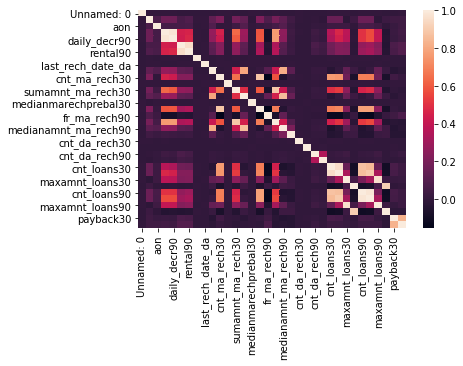

In [33]:
dscor=ds.corr()
sns.heatmap(dscor)

Based on the heatmap many columns are somewhat correlated to the target column, but none are strongly correlated. We will therefore keep all the data columns to help with classification at this time.

# Summary statistics

In [34]:
ds.describe()

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,206470.000000,206470.000000,206470.000000,206470.000000,206470.000000,206470.000000,206470.000000,206470.000000,206470.000000,206470.000000,...,206470.000000,206470.000000,206470.000000,206470.000000,206470.000000,206470.000000,206470.000000,206470.000000,206470.000000,206470.000000
mean,104793.348869,0.885020,654.936344,5380.175964,6081.669534,2693.140770,3483.763531,3751.908691,3724.697489,2063.536301,...,2.759171,17.953969,6.655127,0.053959,3.694135,23.648578,6.703628,0.046036,3.397979,4.320330
std,60492.436398,0.348196,499.369357,9214.446411,10916.667564,4310.331381,5770.063579,53860.851484,53464.428254,2368.406156,...,2.554067,17.376855,2.148105,0.217907,4.028241,26.477150,2.104274,0.200582,8.804600,10.301108
min,1.000000,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52409.250000,1.000000,243.000000,42.480000,42.710750,280.800000,300.390000,1.000000,0.000000,770.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,104800.500000,1.000000,519.000000,1470.765833,1500.000000,1084.365000,1334.815000,3.000000,0.000000,1539.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,157167.750000,1.000000,963.000000,7246.826500,7802.975000,3357.320000,4203.572500,7.000000,0.000000,2309.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,209593.000000,2.000000,2440.000000,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,...,50.000000,306.000000,12.000000,3.000000,71.000000,438.000000,12.000000,3.000000,171.500000,171.500000


The standard deviations are extremely large in almost all the columns. That will make it more difficult for the model to predict accurate results.

# Data visualizations

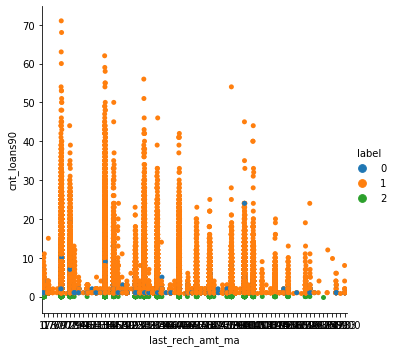

In [35]:
sns.catplot(x='last_rech_amt_ma', y= 'cnt_loans90', hue='label', data=ds, kind='strip')

The amount of loans taken over the past 90 days trends down as the amount of last recharge increases. This makes sense as people who have more money are able to recharge their acounts with greater amounts and have need of a loan less often.

In [36]:
# Isolate numerical data columns
num_cols=ds.drop(columns=['Unnamed: 0', 'msisdn', 'pcircle', 'pdate'])

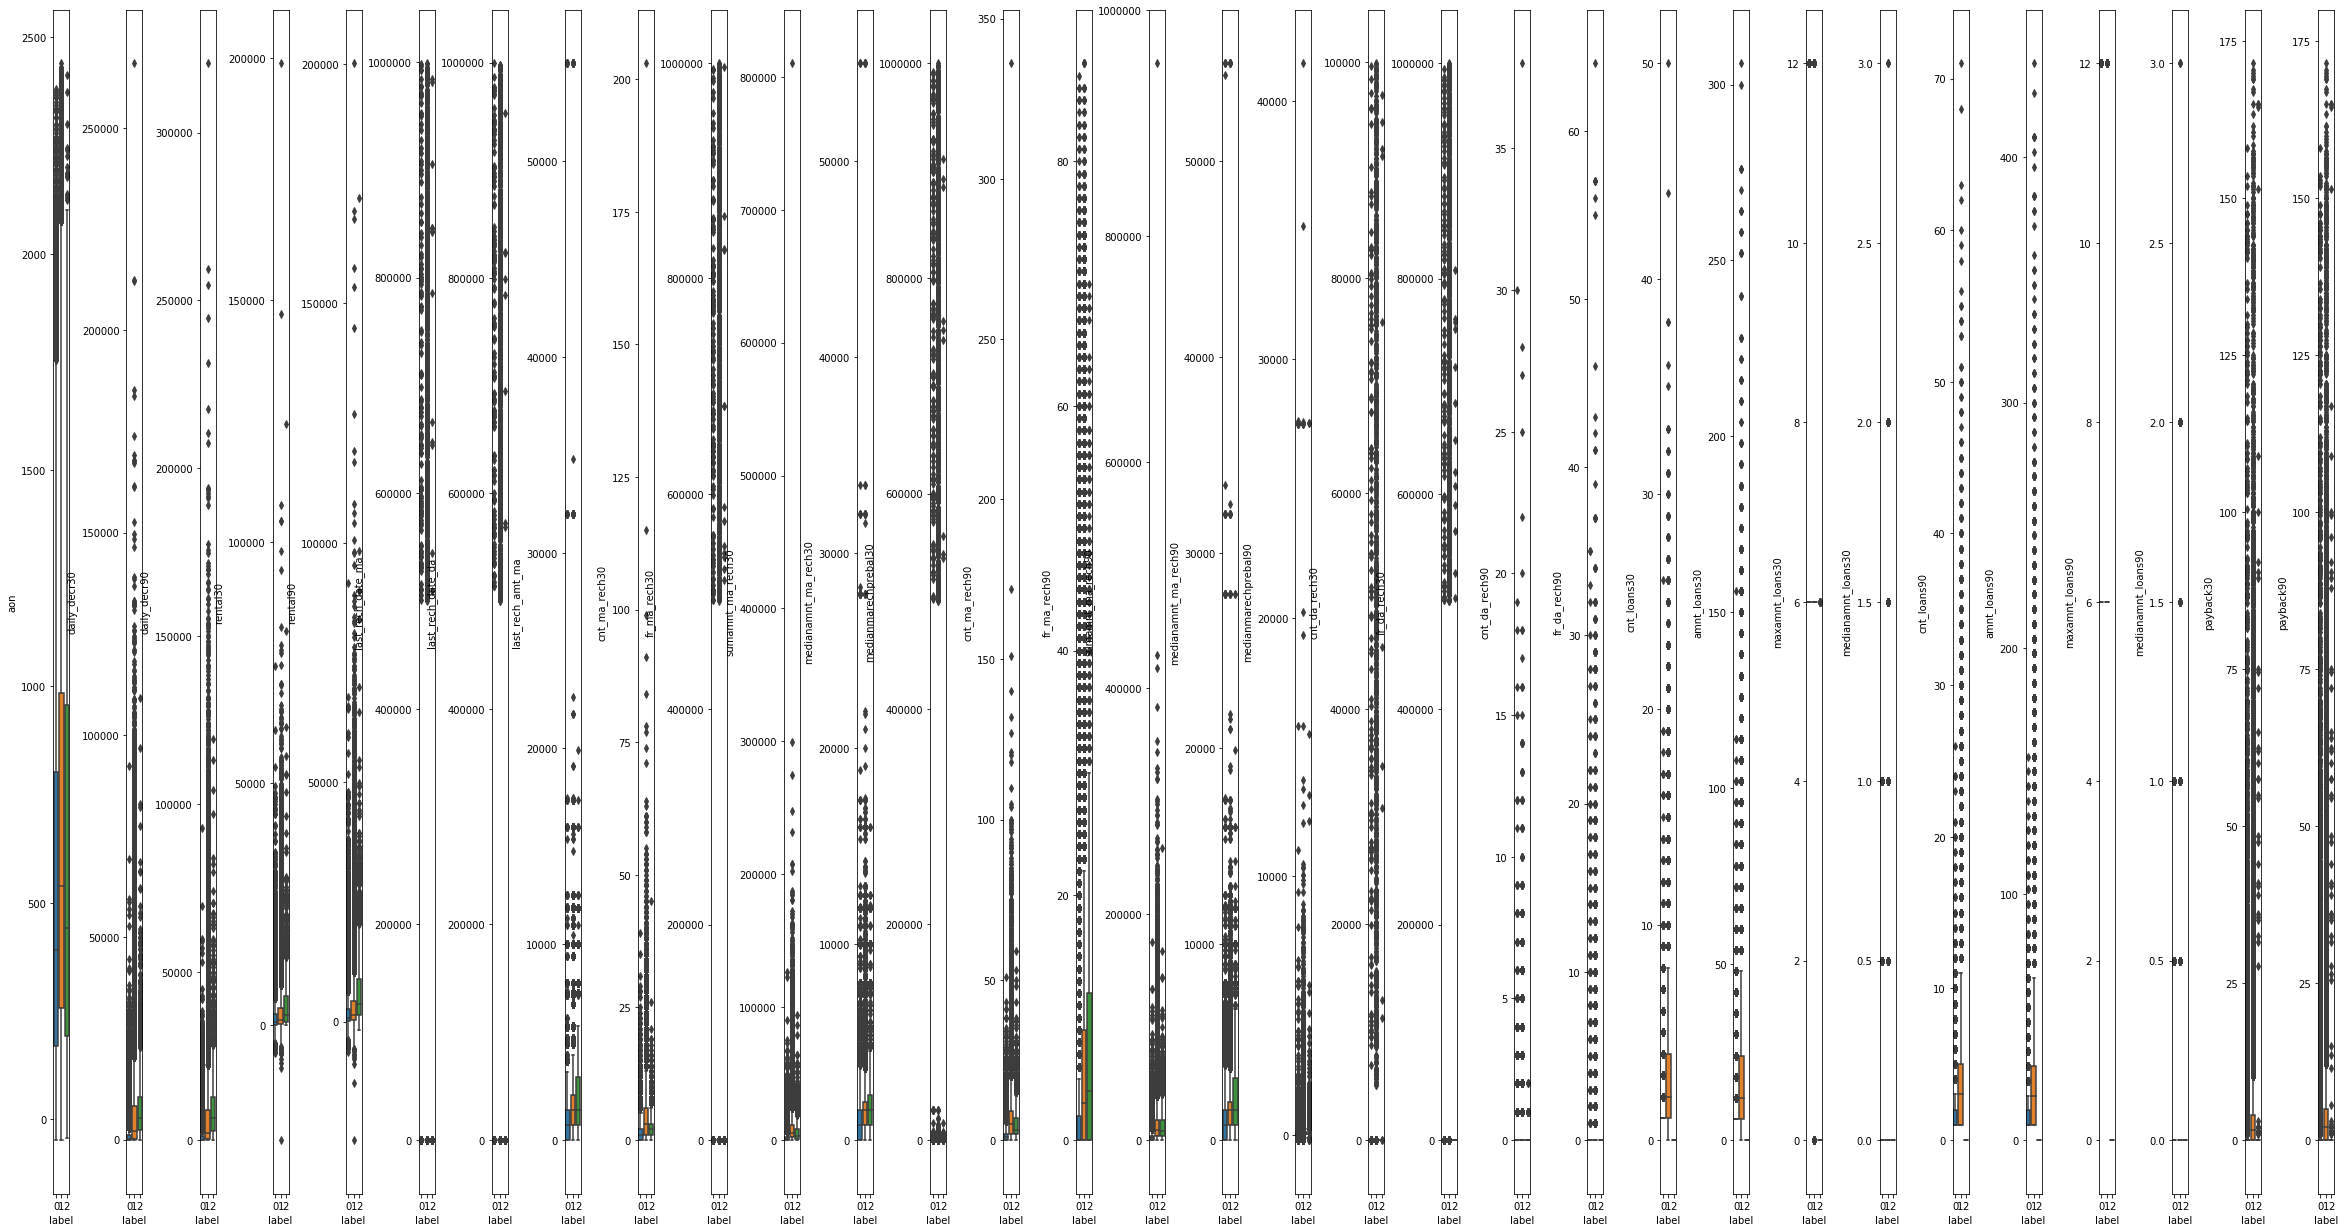

In [37]:
# Show boxplots for all columns grouped by the target column
collist=num_cols.columns.values
ncol=34
nrows=10

plt.figure(figsize=(ncol,5*ncol))
for i in range(1, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(x=num_cols['label'],y=num_cols[collist[i]], orient='v')
    plt.tight_layout()

Used the boxplots above to see which boxplots would be worth looking at individually.

# Individual boxplots

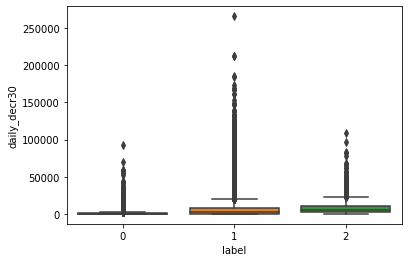

In [38]:
# Show the boxplot for an individual column grouped by the target column
sns.boxplot(x='label',y='daily_decr30',data=ds)

daily_decr30 = Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)

The results in the boxplot make perfect sense as the clients who have been unable to repay loans have spent the least per day (presumably due to a lack of funds).
The clients who have been repaying their loans spend more per day than those who don't repay their loans and the clients who are not making use of the loan option spent the most per day (as they presumably have enough money to avoid going ito debt).
 
Clients who do repay their debt have a very large spread in their data though.

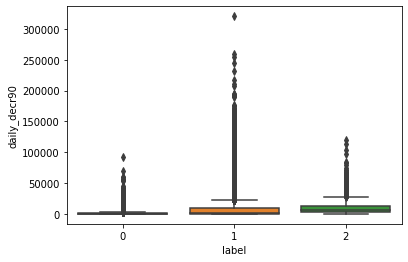

In [39]:
# Show the boxplot for an individual column grouped by the target column
sns.boxplot(x='label',y='daily_decr90',data=ds)

daily_decr90 = Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)

The same trend as seen in daily_decr_30 persists. They are practically identical.

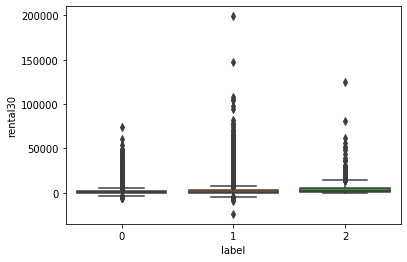

In [40]:
# Show the boxplot for an individual column grouped by the target column
sns.boxplot(x='label',y='rental30',data=ds)

rental30 = Average main account balance over last 30 days

The same trend as seen in daily_decr_30 persists.

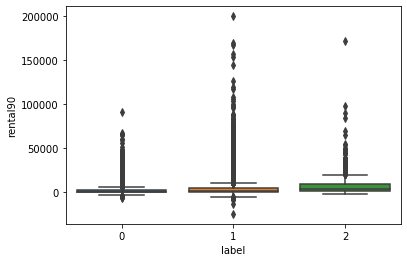

In [41]:
# Show the boxplot for an individual column grouped by the target column
sns.boxplot(x='label',y='rental90',data=ds)

rental90 = Average main account balance over last 90 days

The same trend as seen in daily_decr_30 persists. Except that the differences between the classes are more pronounced over the longer period.

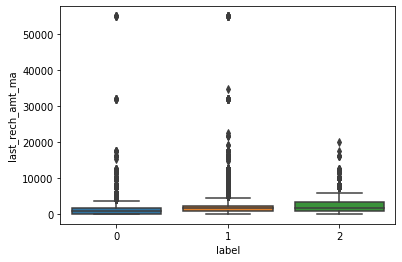

In [42]:
# Show the boxplot for an individual column grouped by the target column
sns.boxplot(x='label',y='last_rech_amt_ma',data=ds)

last_rech_amt_ma = Amount of last recharge of main account (in Indonesian Rupiah)

The same trend as seen in daily_decr_30 persists, although the spread of the data widens.

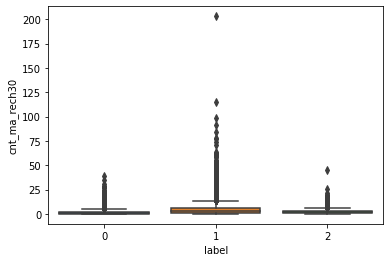

In [43]:
# Show the boxplot for an individual column grouped by the target column
sns.boxplot(x='label',y='cnt_ma_rech30',data=ds)

cnt_ma_rech30 = Number of times main account got recharged in last 30 days

In this case the clients who repay their loans also recharged their main accounts most often. Probably due to the loans they take out.

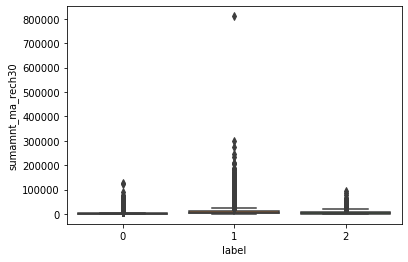

In [44]:
# Show the boxplot for an individual column grouped by the target column
sns.boxplot(x='label',y='sumamnt_ma_rech30',data=ds)

sumamnt_ma_rech30 = Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)

The clients who repay their loans are once again the ones recharging the most (presumably due to them recharging more often).

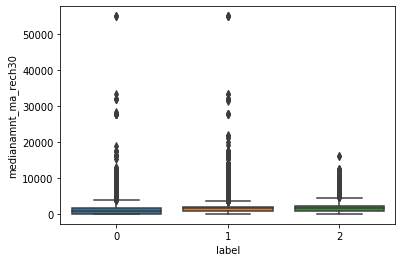

In [45]:
# Show the boxplot for an individual column grouped by the target column
sns.boxplot(x='label',y='medianamnt_ma_rech30',data=ds)

medianamnt_ma_rech30 = Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)

Trending up from 0-2 through the classes. Not entirely sure why. Need to investigate further.

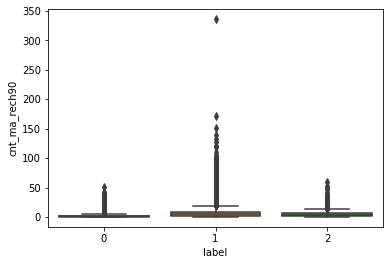

In [46]:
# Show the boxplot for an individual column grouped by the target column
sns.boxplot(x='label',y='cnt_ma_rech90',data=ds)

cnt_ma_rech90 = Number of times main account got recharged in last 90 days

Clients who repay loans recharge most often while clients who don't take out loans recharge slightly less often than them.

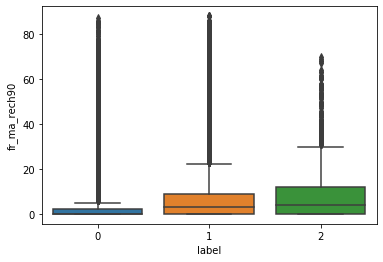

In [47]:
# Show the boxplot for an individual column grouped by the target column
sns.boxplot(x='label',y='fr_ma_rech90',data=ds)

fr_ma_rech90 = Frequency of main account recharged in last 90 days

Data trends up through classes 0-2.  

That is unexpected because on a 1 month basis clients who repay their loans were recharging most often. It could indicate that Clients who repay their loans are transitioning into clients who don't take out loans.  

This would be good news as that is the aim of the project.  There is however insufficient data to say for sure.  

Data will have to be collected over a greater span of time and analyzed for a set spread o time (possibly in time blocks, probably aligned by start dates for clients) to determine if this is true in some or most cases.

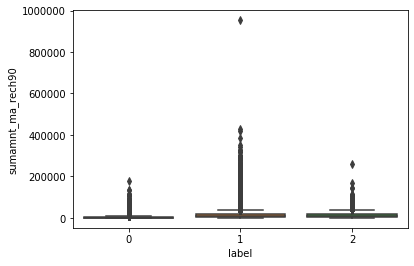

In [48]:
# Show the boxplot for an individual column grouped by the target column
sns.boxplot(x='label',y='sumamnt_ma_rech90',data=ds)

sumamnt_ma_rech90 = Total amount of recharge in main account over last 90 days (in Indonasian Rupiah)

Clients who repay their loans recharge most often. Values are more similar to clients who don't take out loans.

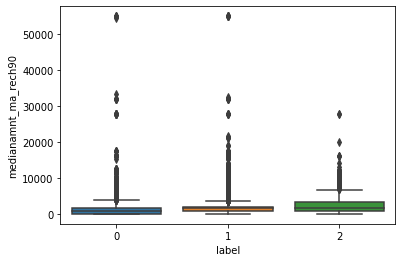

In [49]:
# Show the boxplot for an individual column grouped by the target column
sns.boxplot(x='label',y='medianamnt_ma_rech90',data=ds)

medianamnt_ma_rech90 = Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah)

This also seems to indicate that 2's used to be 1's.

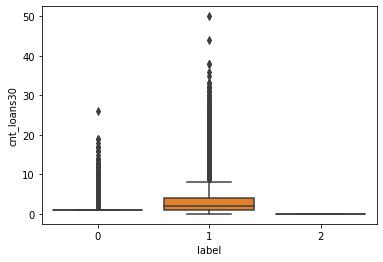

In [50]:
# Show the boxplot for an individual column grouped by the target column
sns.boxplot(x='label',y='cnt_loans30',data=ds)

cnt_loans30 = Number of loans taken by user in last 30 days

Far more clients pay back their loans than not.  In that sense the project looks succesful at present. The amount of gains should be able to cover the losses making the project viable.

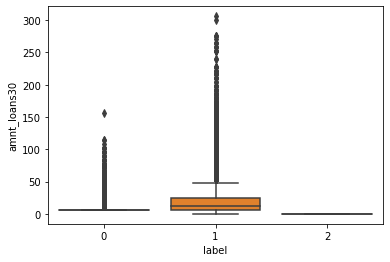

In [51]:
# Show the boxplot for an individual column grouped by the target column
sns.boxplot(x='label',y='amnt_loans30',data=ds)

amnt_loans30 = Total amount of loans taken by user in last 30 days

Most of the loans are taken out by clients who repay them.

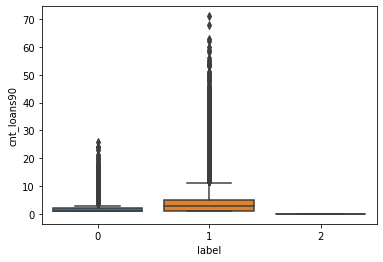

In [52]:
# Show the boxplot for an individual column grouped by the target column
sns.boxplot(x='label',y='cnt_loans90',data=ds)

cnt_loans90 = Number of loans taken by user in last 90 days

Same as in cnt_loans30. Most of the loans are taken out by clients who repay them, except that more loans were taken out by clients who didn't repay their loans.

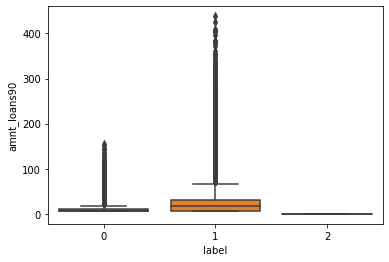

In [53]:
# Show the boxplot for an individual column grouped by the target column
sns.boxplot(x='label',y='amnt_loans90',data=ds)

amnt_loans90 = Total amount of loans taken by user in last 90 days

The same trend as seen in cnt_loans30 persists.

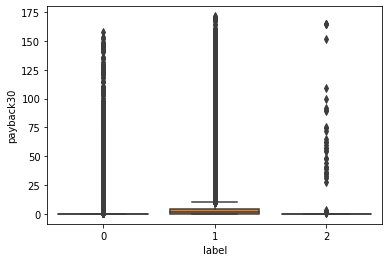

In [54]:
# Show the boxplot for an individual column grouped by the target column
sns.boxplot(x='label',y='payback30',data=ds)

payback30 = Average payback time in days over last 30 days

As expected clients who repayed their loans are most common.  The data does however show that both clients who didn't repay their loans on time and clients who have not tken out loans in the last 90 dys continue to repay loans after they have defualted.
This also indicates that some clients who have not taken out loans in the last 90 days were blocked from taking out loans due to defualting on repaying loans in the past. This also suggests that a fourth class is present and could be isolated based on the ****** and payback columns.

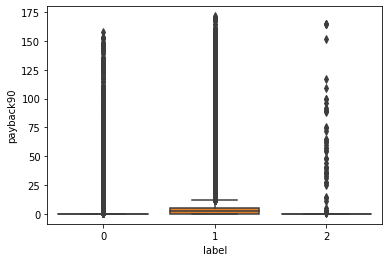

In [55]:
# Show the boxplot for an individual column grouped by the target column
sns.boxplot(x='label',y='payback90',data=ds)

payback90 = Average payback time in days over last 90 days

The same trend as seen in paybac30 persists.

# Check eveness of dataset

In [56]:
label_counts = ds['label'].value_counts()
label_counts

1    178708
0     25751
2      2011
Name: label, dtype: int64

In [57]:
label_percentage = ds['label'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
label_percentage

1    86.6%
0    12.5%
2     1.0%
Name: label, dtype: object

The data is not distributed evenly over the target column. Therefore the model will have difficulty making accurate predictions. Stratify data over target column during train-test split to minimise this effect.

# Encode categorical columns to numeric values

In [58]:
eds=ds

In [59]:
eds.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [60]:
# Encode one or specific columns in a dataset
from sklearn.preprocessing import LabelEncoder

Encoderds = LabelEncoder() 
eds['pdate'] = Encoderds.fit_transform(eds['pdate'])

In [61]:
eds.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,49
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,70
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,79
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,5
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,21


# Check correlation after encoding

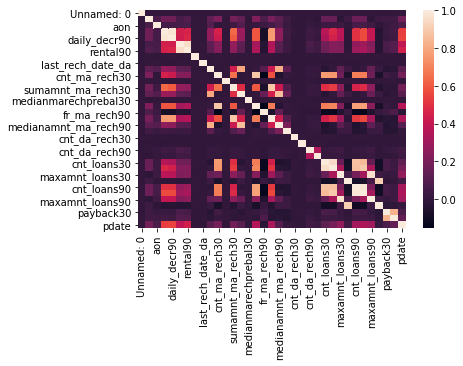

In [62]:
dscor=eds.corr()
sns.heatmap(dscor)

The models were run with only the best correlated columns but it gave worse results.

# Drop irrelevant columns

In [63]:
ds.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [64]:
# Drop irrelevant (poorly correlated) columns - dataset renamed to nds (new dataset)
nds=ds.drop(columns=['Unnamed: 0', 'msisdn', 'pcircle', 'medianamnt_loans30','medianamnt_loans90'])

The median columns in the loans section were dropped because the data was misleading.  The predictive models were also run with them included but performed worse when they were included.

# Find and remove outliers

In [65]:
nds.shape

(206470, 32)

In [66]:
nds.dtypes

label                     int64
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
payback30               float64
payback90               float64
pdate   

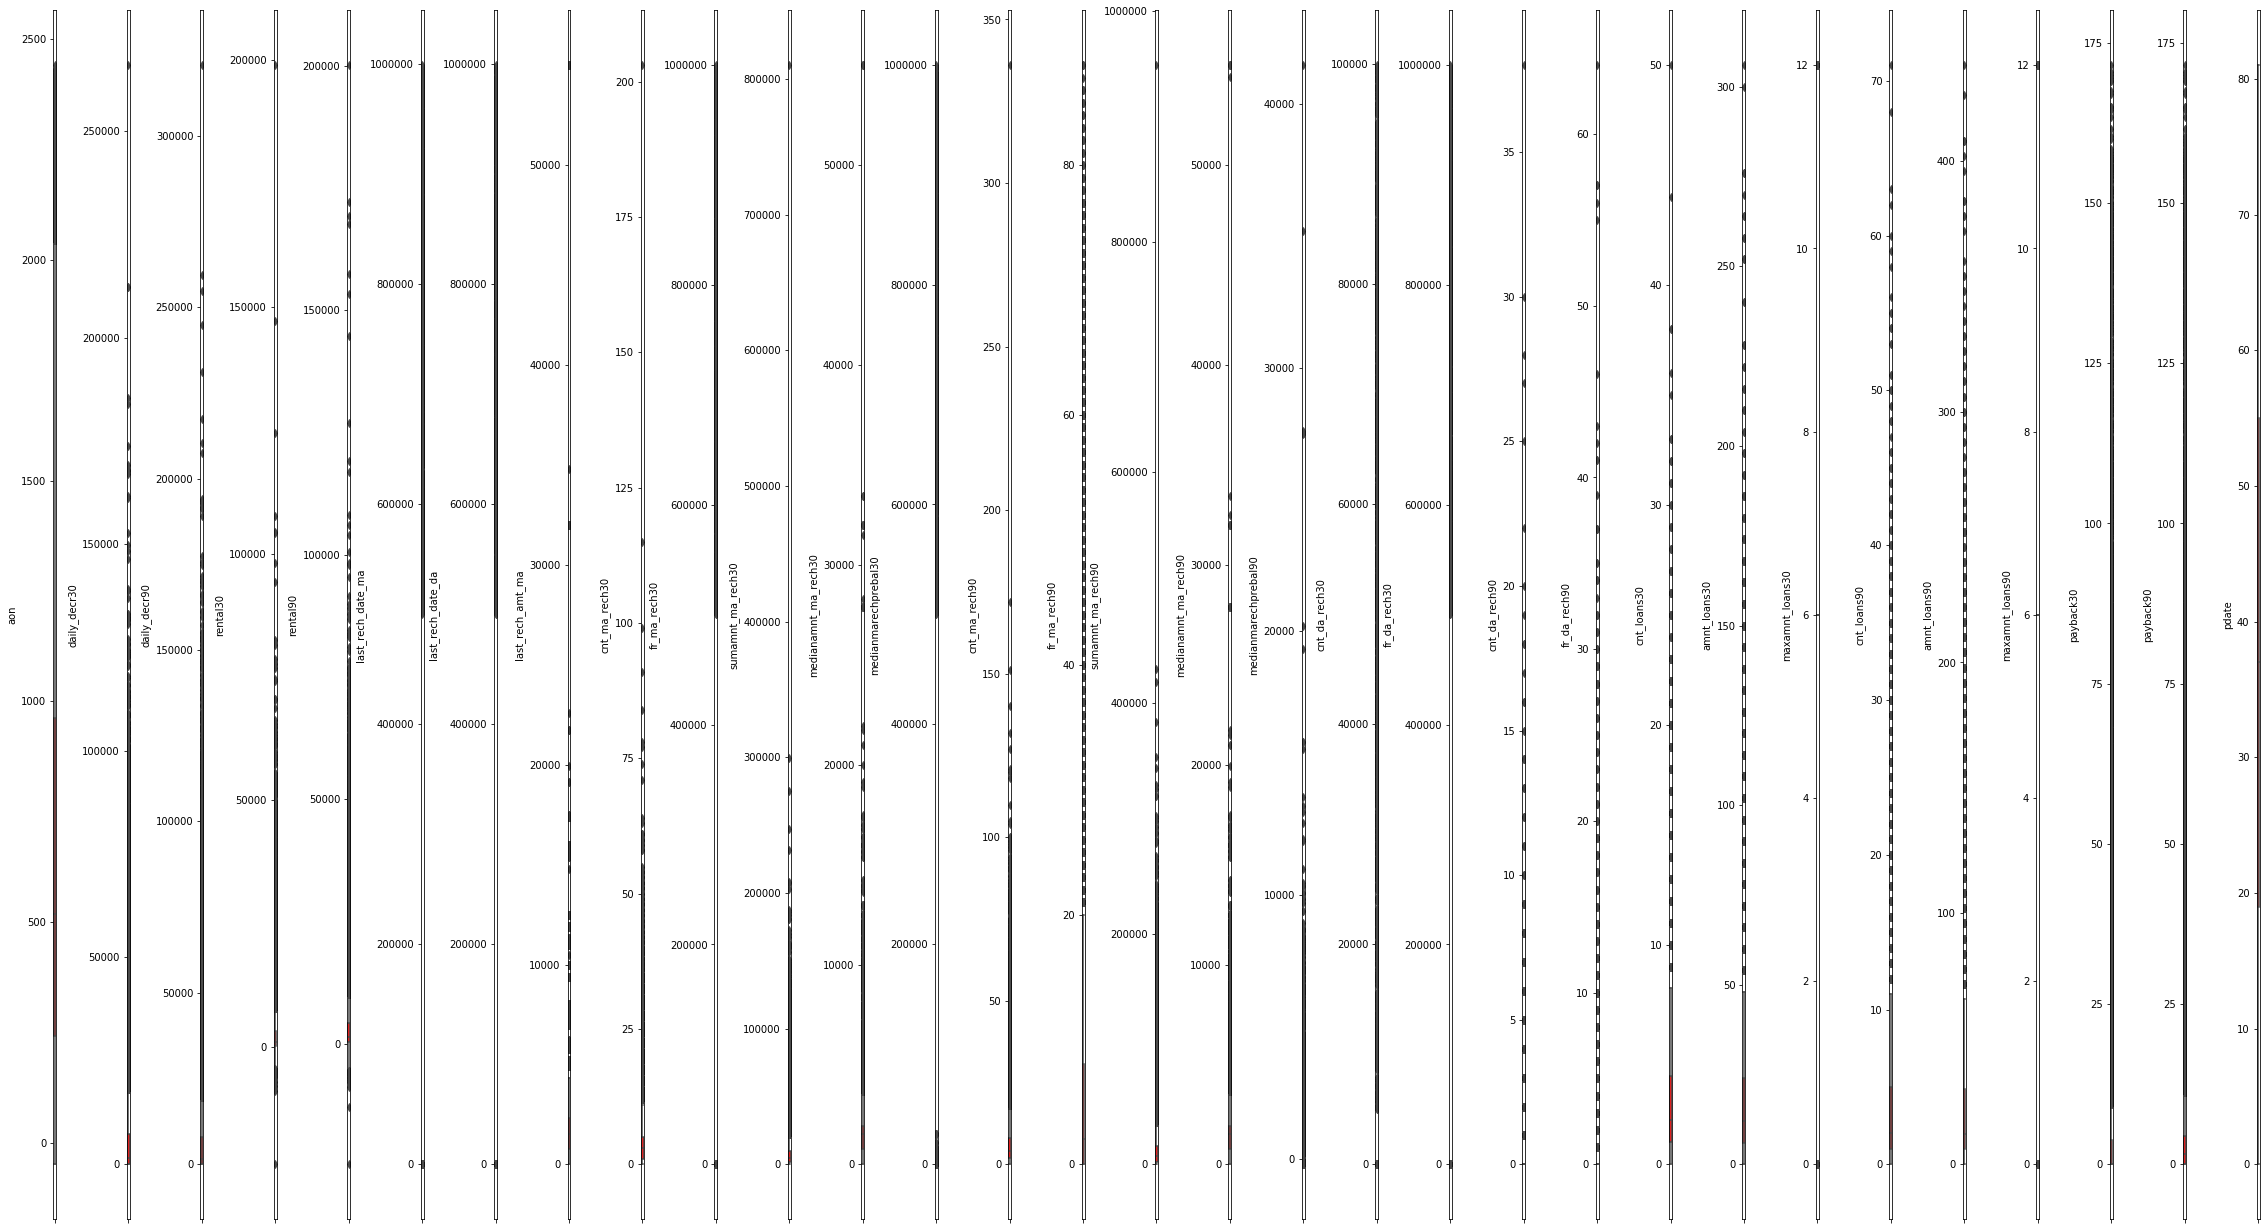

In [67]:
# Show boxplots for all columns, check outliers
collist=nds.columns.values
ncol=34
nrows=10

plt.figure(figsize=(ncol,5*ncol))
for i in range(1, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(nds[collist[i]], color='red', orient='v')
    plt.tight_layout()

In [68]:
# Remove outliers - dataset renamed to cds (clean dataset)
from scipy import stats
from scipy.stats import zscore

z_score=abs(zscore(nds))
print(nds.shape)
cds=nds.loc[(z_score<5.0).all(axis=1)]
print(cds.shape)

(206470, 32)
(191597, 32)


A z-score of 3 would be better but almost half of the data is lost that way (due to the wide spread of most of the data). We compromised by enlarging the z-score cut-off to 5 resulting in a loss of only 8.1% of data. 

In [69]:
# Calculate percentage of total data left after dropping rows and applying the zscore cutoff.
191597/209593*100

91.41383538572376

Total data loss of 8.6%

# Check and adjust skewness

In [70]:
# Show skewness (less than 0.55 is ok)
cds.skew()

label                   -1.690191
aon                      0.949015
daily_decr30             2.289199
daily_decr90             2.423385
rental30                 2.479585
rental90                 2.609291
last_rech_date_ma        3.090800
last_rech_date_da        9.990232
last_rech_amt_ma         2.215918
cnt_ma_rech30            1.655060
fr_ma_rech30             2.004941
sumamnt_ma_rech30        2.074195
medianamnt_ma_rech30     2.438871
medianmarechprebal30    10.662589
cnt_ma_rech90            1.789183
fr_ma_rech90             2.175861
sumamnt_ma_rech90        2.164130
medianamnt_ma_rech90     2.456881
medianmarechprebal90     4.848508
cnt_da_rech30           37.576762
fr_da_rech30            93.792695
cnt_da_rech90            7.441460
fr_da_rech90            74.042973
cnt_loans30              1.868081
amnt_loans30             1.890683
maxamnt_loans30          1.495430
cnt_loans90              2.070202
amnt_loans90             2.096210
maxamnt_loans90          1.758784
payback30     

Treating for skewness caused NaN values to form so it was left out at this stage, it was also attempted after the StandardScaler was applied at which point it produced infinite values. The dataset was therefore never treated for skewness.

# Split data into x and y

In [71]:
cds.columns

Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'cnt_loans90', 'amnt_loans90', 'maxamnt_loans90',
       'payback30', 'payback90', 'pdate'],
      dtype='object')

In [72]:
cds.shape

(191597, 32)

In [73]:
# Lineup target and input values
cds_x=cds.drop(columns=['label'])
y=cds[['label']]

# Apply scaler

In [74]:
#Scaling for linear regression
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
xsc=sc.fit_transform(cds_x)
xsc=pd.DataFrame(xsc,columns=cds_x.columns)

In [75]:
xsc.skew()

aon                      0.949015
daily_decr30             2.289199
daily_decr90             2.423385
rental30                 2.479585
rental90                 2.609291
last_rech_date_ma        3.090800
last_rech_date_da        9.990232
last_rech_amt_ma         2.215918
cnt_ma_rech30            1.655060
fr_ma_rech30             2.004941
sumamnt_ma_rech30        2.074195
medianamnt_ma_rech30     2.438871
medianmarechprebal30    10.662589
cnt_ma_rech90            1.789183
fr_ma_rech90             2.175861
sumamnt_ma_rech90        2.164130
medianamnt_ma_rech90     2.456881
medianmarechprebal90     4.848508
cnt_da_rech30           37.576762
fr_da_rech30            93.792695
cnt_da_rech90            7.441460
fr_da_rech90            74.042973
cnt_loans30              1.868081
amnt_loans30             1.890683
maxamnt_loans30          1.495430
cnt_loans90              2.070202
amnt_loans90             2.096210
maxamnt_loans90          1.758784
payback30                3.664821
payback90     

# Determine the amount of columns for PCA

In [76]:
# Show the covariance matrix
print('NumPy covariance matrix: \n%s' %np.cov(xsc.T))

NumPy covariance matrix: 
[[ 1.00000522e+00  6.78466615e-02  6.98860556e-02  6.17759521e-02
   6.57135422e-02  2.25942984e-02 -6.41488656e-03  9.44381326e-02
   4.46180426e-03  4.37346029e-02  5.32991284e-02  9.61825504e-02
   2.86307705e-02  2.66014475e-02  3.52475417e-02  7.48788319e-02
   1.03090861e-01  2.68804211e-02 -6.44267824e-03 -3.95985975e-04
   1.03760862e-02  2.11893411e-04  4.10436238e-02  4.41363270e-02
   3.19988054e-02  7.34973457e-02  7.34486289e-02  3.65668909e-02
   1.45386635e-02  3.38209424e-02  7.30275337e-02]
 [ 6.78466615e-02  1.00000522e+00  9.77303009e-01  4.58601489e-01
   4.89959127e-01 -5.57225911e-02  5.28874271e-02  2.80545432e-01
   4.13196715e-01  7.60937112e-02  5.74003920e-01  2.92331879e-01
   9.88645481e-02  5.80657211e-01 -6.20381183e-02  7.31624337e-01
   2.52875969e-01  5.84272101e-02  7.43263878e-03  6.78559038e-03
   2.75839597e-02  8.62725869e-03  3.34874470e-01  4.37855946e-01
   3.91402636e-01  5.01202893e-01  5.61346706e-01  4.15584808e-01

In [77]:
#Perform eigendecomposition on covariance matrix
cov_mat = np.cov(xsc.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-3.32667757e-02  5.43794129e-02  1.80527866e-02  5.01303925e-02
   2.04379695e-02  2.96190105e-02 -2.93002805e-02 -2.67644215e-03
   9.26375476e-02 -7.45355609e-01 -1.21573497e-01 -6.25392449e-01
  -3.99945573e-03 -8.12360630e-02 -1.14269547e-01  1.47415397e-02
   1.75321062e-02  5.61426872e-03 -1.37937066e-02  4.21815573e-03
  -1.51740934e-02  1.18725185e-02 -2.15787687e-03 -3.90136002e-03
  -7.23546898e-03  8.89591901e-05 -7.79691525e-04  6.04202945e-04
   1.84737776e-03 -4.36535530e-03  2.57894889e-04]
 [-2.85221536e-01  1.13073245e-01  1.47352344e-01 -1.03628581e-01
  -7.15524889e-03  6.13727770e-02 -4.05005283e-02  3.52784186e-02
  -3.25119735e-02  1.16624348e-01 -1.74085063e-02 -1.04325891e-01
  -3.19991267e-01 -7.74206307e-02  1.10426023e-01  3.77746503e-01
  -2.03219363e-03  2.34767706e-02 -1.88850436e-01  1.08424578e-01
  -2.33137067e-01 -1.32122551e-02 -3.31089314e-02 -5.36609961e-02
   9.62009283e-02  2.58720598e-02  1.70992480e-01 -6.17446361e-01
  -1.281036

In [78]:
# Visually confirm that the list is correctly sorted by decreasing eigenvalues
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
7.933798439204934
3.6504492409658926
2.2205280225930633
1.9333975575997544
1.9477432153018919
1.5542236053020386
1.4729121349401602
1.523962640797409
1.1298618556127895
1.0356387423601603
0.9994457270380886
0.917919860855332
0.9608903919899134
0.6521234800316085
0.6051468191233318
0.4286255453187546
0.32987804356557837
0.3240682705067602
0.2505994162914201
0.1790726445226051
0.20725701490460915
0.20299809289563914
0.19941126850086913
0.12118811270748603
0.07886358755565123
0.0003648951131473436
0.04483750728922866
0.015541406556325544
0.02097357874540939
0.024674379224444352
0.03376630137069071


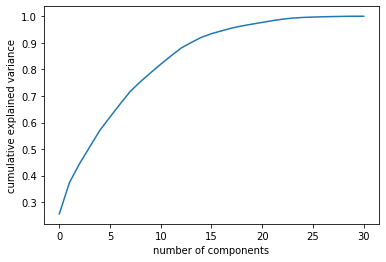

In [79]:
#Explained variance construct scree plot
from sklearn.decomposition import PCA
pca = PCA().fit(xsc)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

# Apply PCA to reduce the amount of x columns¶

We decided to use a PCA because many of the columns showed similar data trends and would relate to one another closely.

In [80]:
# Apply PCA to reduce the amount of input columns
from sklearn.decomposition import PCA
pca=PCA(n_components=15) 
xsc.shape

(191597, 31)

In [81]:
cds_array=pca.fit_transform(xsc)
x=pd.DataFrame(cds_array)
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-0.830659,-0.622105,3.091582,-2.059349,5.918876,-1.324354,0.521093,0.913783,0.738124,1.372001,-0.122463,-1.063537,0.159171,0.849942,-0.791951
1,0.889932,4.087628,1.443127,0.146753,-2.114998,-1.615514,1.735203,-1.231113,1.509206,-0.107961,0.019488,0.040890,0.281844,0.410337,0.535303
2,-1.991766,0.229546,0.580589,0.147967,-1.043765,0.337346,-0.112640,-0.087672,0.207065,0.399795,0.003628,-0.899115,-0.442829,0.363253,0.886895
3,-2.922584,-0.538599,-0.352030,0.359821,-1.335176,0.289064,0.151650,-1.001436,2.088873,-0.370566,0.164237,-0.305185,2.051206,0.269113,-1.195775
4,2.018655,-1.060985,-2.714171,-0.023831,0.748921,0.046434,0.402185,-0.753255,0.454377,-0.535755,-0.074302,1.004180,-0.221145,0.130972,-0.134351


# Balance imbalanced dataset

In [82]:
#conda install -c glemaitre imbalanced-learn

In [83]:
#!pip install imblearn

  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.1
    Uninstalling scikit-learn-0.22.1:
      Successfully uninstalled scikit-learn-0.22.1


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\users\\admin\\anaconda3\\lib\\site-packages\\~klearn\\decomposition\\_cdnmf_fast.cp37-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [87]:
conda install -c conda-forge imbalanced-learn

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\admin\anaconda3

  added / updated specs:
    - imbalanced-learn


The following NEW packages will be INSTALLED:

  python_abi         conda-forge/win-64::python_abi-3.7-1_cp37m

The following packages will be SUPERSEDED by a higher-priority channel:

  conda               pkgs/main::conda-4.9.2-py37haa95532_0 --> conda-forge::conda-4.9.2-py37h03978a9_0


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [86]:
conda update -n base -c defaults conda


Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\admin\anaconda3

  added / updated specs:
    - conda


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    backports.functools_lru_cache-1.6.1|     pyhd3eb1b0_0          12 KB
    conda-4.9.2                |   py37haa95532_0         2.9 MB
    conda-package-handling-1.7.2|   py37h76e460a_0         724 KB
    httpcore-0.12.2            |     pyhd3eb1b0_0          32 KB
    keyrings.alt-4.0.1         |   py37haa95532_0          77 KB
    ------------------------------------------------------------
                                           Total:         3.7 MB

The following packages will be REMOVED:

  python_abi-3.7-1_cp37m

The following packages will be UPDATED:

  conda-package-han~                   1.6.0-py37h62dcd97_0 --> 1.7.2-py37h76e460a_0
  httpcore                                      

In [89]:
import imblearn
import sklearn
from imblearn.over_sampling import SMOTE
from collections import Counter

ImportError: cannot import name '_to_object_array' from 'sklearn.utils' (C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\__init__.py)

In [ ]:
# transform the dataset
oversample = SMOTE()
x, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

# Train-Test split

In [ ]:
# Train test split
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x,y, random_state=55, test_size=0.20)

# Models

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

After comparing several models and running them with different input columns and scalers the RandomForrestClassifier model was selected because it had the highest scores as can be seen below:

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf= RandomForestClassifier(n_estimators=1000,random_state=42)#100 is defualt
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print('Accuracy score: ',accuracy_score(y_test,predrf))
#print('Cross validation score =',cross_val_score(rf,x,y, cv=10, scoring='accuracy').mean())
# The above was deactivated to preserve runtime. The score was roughly 88% though.

print(confusion_matrix(y_test,predrf))
# Calculate False-Positive,False-Negative, True-Positive and True-Negative values
#FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)  # AttributeError: 'function' object has no attribute 'sum'
#FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
#TP = np.diag(confusion_matrix)
#TN = confusion_matrix.values.sum() - (FP + FN + TP)
# Specificity calculation
#Specificity = TN/(TN + FP) 
#print('Specificity: ', Specificity)
print(classification_report(y_test,predrf))

In [ ]:
# Find Roc-auc_score for RandomForrestClassifier
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing

predrf=rf.predict(x_test)
def multiclass_roc_auc_score(y_test, predrf, average="macro"):
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    pred_rf = lb.transform(predrf)
    return roc_auc_score(y_test, pred_rf, average=average)

print('Roc_auc_score: ',multiclass_roc_auc_score(y_test, predrf, average="macro"))

# The following models were alternatives that were run but not selected.

Originally the best parameters for the alternative models were determined using GridSearchCV. They were left out of the final file to reduce runtime.

The MunltinomialNB model was also run using the MinMaxScaler but the scores were less than that of the chosen model so it was left out of the final comparison. 

The GradientBoostingClassifier was also attempted but abandonned due to an extremely long runtime.

The Roc_auc_scores are not available for the models that were not selected.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
KNN=KNeighborsClassifier(n_neighbors= 10)
DT=DecisionTreeClassifier(criterion='entropy')# check random_state?
AD=AdaBoostClassifier()

In [ ]:
models=[]
models.append(('KneighborsClassifier',KNN))
models.append(('DecisionTreeClassifier',DT))
models.append(('AdaBoostClassifier',AD))

In [ ]:
model_list=[]
score=[]
cvs=[]
rocscore=[]


for name, model in models:
    print('*************************',name,'*************************',end='\n\n')
   
    model_list.append(name)
    model.fit(x_train,y_train)
    print(model,end='\n\n')
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy score =',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y, cv=10, scoring='accuracy').mean()
    print('cross validation score =',sc)
    cvs.append(sc*100)
    print('\n')
    
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n\n')
    predrf=rf.predict(x_test)
    def multiclass_roc_auc_score(y_test, predrf, average="macro"):
        lb = preprocessing.LabelBinarizer()
        lb.fit(y_test)
        y_test = lb.transform(y_test)
        pred_rf = lb.transform(predrf)
        return roc_auc_score(y_test, pred_rf, average=average)

    print('Roc_auc_score: ',multiclass_roc_auc_score(y_test, predrf, average="macro"))
    roc_auc=multiclass_roc_auc_score(y_test, predrf, average="macro")
    rocscore.append(roc_auc*100)

In [ ]:
# Show the results of the models above in a table
result=pd.DataFrame({'Model': model_list, 'Accuracy_score': score, 'Cross_val_score':cvs})
result

# Save the model

In [ ]:
#save model as a pickle file
from sklearn.externals import joblib
joblib.dump(rf,'Micro_Loans.pkl')

In [ ]:
# Load and use model to make a prediction
model=joblib.load('Micro_Loans.pkl')
model.predict(x_test)

In [ ]:
# define a to create a list of the column
b = np.array(ds['cnt_loans90'].values.tolist())

In [ ]:
# Change values greater than 12 to the most common value in the column (6)
ds['cnt_loans90'] = np.where(b > 71, 1, b).tolist()

In [ ]:
# Reassign dataset to the original name
ds=ds3